## Homework: Open-Source LLMs
In this homework, we'll experiment more with Ollama

## Q1. Running Ollama with Docker
Let's run ollama with Docker. We will need to execute the same command as in the lectures:


``` bash
docker run -it \
    --rm \
    -v ollama:/root/.ollama \
    -p 11434:11434 \
    --name ollama \
    ollama/ollama
```

What's the version of ollama client?

To find out, enter the container and execute ollama with the -v flag.

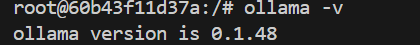

### Answer:
- 0.1.48

## Q2. Downloading an LLM
We will donwload a smaller LLM - gemma:2b.

Again let's enter the container and pull the model:

```ollama pull gemma:2b```

In docker, it saved the results into /root/.ollama

We're interested in the metadata about this model. You can find it in ```models/manifests/registry.ollama.ai/library```

What's the content of the file related to gemma?

### Answer:
```{"schemaVersion":2,"mediaType":"application/vnd.docker.distribution.manifest.v2+json","config":{"mediaType":"application/vnd.docker.container.image.v1+json","digest":"sha256:887433b89a901c156f7e6944442f3c9e57f3c55d6ed52042cbb7303aea994290","size":483},"layers":[{"mediaType":"application/vnd.ollama.image.model","digest":"sha256:c1864a5eb19305c40519da12cc543519e48a0697ecd30e15d5ac228644957d12","size":1678447520},{"mediaType":"application/vnd.ollama.image.license","digest":"sha256:097a36493f718248845233af1d3fefe7a303f864fae13bc31a3a9704229378ca","size":8433},{"mediaType":"application/vnd.ollama.image.template","digest":"sha256:109037bec39c0becc8221222ae23557559bc594290945a2c4221ab4f303b8871","size":136},{"mediaType":"application/vnd.ollama.image.params","digest":"sha256:22a838ceb7fb22755a3b0ae9b4eadde629d19be1f651f73efb8c6b4e2cd0eea0","size":84}]}```

## Q3. Running the LLM
Test the following prompt: "10 * 10". What's the answer?

```set a client```

In [2]:
from openai import OpenAI


client = OpenAI(
    base_url = 'http://localhost:11434/v1/',
    api_key = 'ollama'
    
)

In [3]:
def llm(prompt):
    response = client.chat.completions.create(
        model='gemma:2b',
        messages=[{"role": "user", "content": prompt}]
    )
    
    return response.choices[0].message.content

In [4]:
llm('10 * 10')

'Sure. The following code is an example of a Python program that executes a calculation:\n\n```python\n10 * 10\n```\n\n**Explanation:**\n\n* `10` is the first number.\n* `*` is the multiplication operator.\n* `10` is the second number.\n* `=` is the assignment operator.\n\n**Output:**\n\nThe code will execute the calculation and display the result:\n\n```\n100\n```\n\n**Note:**\n\n* The `start_of_turn` and `end_of_turn` are optional keywords that are used by the Python parser to determine the start and end of a code block.\n* The `*` operator can be used for multiplication, division, and exponentiation.\n* The `print()` function can be used to display messages or print values.'

### Answer:

```Sure. The following code is an example of a Python program that executes a calculation:\n\n```python\n10 * 10\n```\n\n**Explanation:**\n\n* `10` is the first number.\n* `*` is the multiplication operator.\n* `10` is the second number.\n* `=` is the assignment operator.\n\n**Output:**\n\nThe code will execute the calculation and display the result:\n\n```\n100\n```\n\n**Note:**\n\n* The `start_of_turn` and `end_of_turn` are optional keywords that are used by the Python parser to determine the start and end of a code block.\n* The `*` operator can be used for multiplication, division, and exponentiation.\n* The `print()` function can be used to display messages or print values.```

## Q4. Donwloading the weights


We don't want to pull the weights every time we run a docker container. Let's do it once and have them available every time we start a container.

First, we will need to change how we run the container.

Instead of mapping the /root/.ollama folder to a named volume, let's map it to a local directory:

```mkdir ollama_files

docker run -it \
    --rm \
    -v ./ollama_files:/root/.ollama \
    -p 11434:11434 \
    --name ollama \
    ollama/ollama```

Now pull the model:

```docker exec -it ollama ollama pull gemma:2b ```

What's the size of the ollama_files/models folder?

- 0.6G
- 1.2G
- 1.7G
- 2.2G

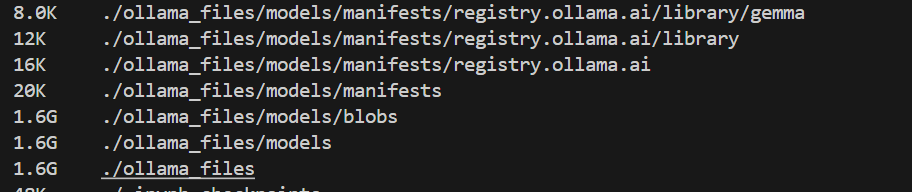

### Answer:
- 1.7 G

## Q5. Adding the weights
Let's now stop the container and add the weights to a new image

For that, let's create a Dockerfile:

```
FROM ollama/ollama

COPY ...
```

What do you put after COPY?

```./ollama_files /root/.ollama```

## Q6. Serving it
Let's build it:

```docker build -t ollama-gemma2b .```

And run it:

```docker run -it --rm -p 11434:11434 ollama-gemma2b```

We can connect to it using the OpenAI client

Let's test it with the following prompt:

```prompt = "What's the formula for energy?"```

Also, to make results reproducible, set the ```temperature``` parameter to 0:

```
response = client.chat.completions.create(
    #...
    temperature=0.0
)
```

How many completion tokens did you get in response?

- 304
- 604
- 904
- 1204

In [10]:
from openai import OpenAI


client = OpenAI(
    base_url = 'http://localhost:11434/v1/',
    api_key = 'ollama'
    
)

In [11]:
def llm(prompt):
    response = client.chat.completions.create(
        model='gemma:2b',
        messages=[{"role": "user", "content": prompt}],
        temperature=0.0
    )
    
    return response.choices[0].message.content

In [13]:
llm("What's the formula for energy?")

"Sure, here's the formula for energy:\n\n**E = K + U**\n\nWhere:\n\n* **E** is the energy in joules (J)\n* **K** is the kinetic energy in joules (J)\n* **U** is the potential energy in joules (J)\n\n**Kinetic energy (K)** is the energy an object possesses when it moves or is in motion. It is calculated as half the product of an object's mass (m) and its velocity (v) squared:\n\n**K = 1/2mv^2**\n\n**Potential energy (U)** is the energy an object possesses due to its position or configuration. It is calculated as the product of an object's mass, gravitational constant (g), and height or position above a reference point.\n\n**U = mgh**\n\nWhere:\n\n* **m** is the mass in kilograms (kg)\n* **g** is the gravitational constant (9.8 m/s^2)\n* **h** is the height or position in meters (m)\n\nThe formula shows that energy can be expressed as the sum of kinetic and potential energy. The kinetic energy is a measure of the object's ability to do work, while the potential energy is a measure of the

```How many completion tokens did you get in response?```

In [16]:
response = client.chat.completions.create(
        model='gemma:2b',
        messages=[{"role": "user", "content": "What's the formula for energy?"}],
        temperature=0.0
    )

In [27]:
response.usage.completion_tokens

304

### Answer:
- 304